In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
import sensor_function as sf

In [74]:
import threading
import time

Warnow-Chacko(South-west): 10894
Urbana(South-east):94415
Urbana on Holmes:107592

In [75]:
import concurrent.futures

In [76]:
sensor_list = [10894, 94415, 107592]
columns = ['new_date', 'PM1.0 (CF=1) ug/m3', 'PM2.5 (CF=1) ug/m3', 'PM10.0 (CF=1) ug/m3',
          'UptimeMinutes', 'ADC', 'Temperature_F', 'Humidity_%', 'PM2.5 (CF=ATM) ug/m3', 'sensor_name']
df_sensor = pd.DataFrame(columns = columns)
# Read feather file
df_UIUC = pd.read_feather('export_UIUC_feather', columns=None, use_threads=True)
df_UIUC = df_UIUC.drop(['index'], axis=1)
# Now we will import the data acquired and cleaned from PurpleAir.com for 3 locations and merge with our dataset.

df_UrbanaOnHolmes = pd.read_feather('D:/IDE/WorkShop/2021Fall_finals/Data/export_UrbanaOnHolmes_feather', columns=None, use_threads=True)
df_Urbana = pd.read_feather('D:/IDE/WorkShop/2021Fall_finals/Data/export_Urbana_feather', columns=None, use_threads=True)
df_Champaign = pd.read_feather('D:/IDE/WorkShop/2021Fall_finals/Data/export_WarnowChacko_feather', columns=None, use_threads=True)

In [79]:
df_Urbana1 = df_Urbana.copy()
df_Champaign1 = df_Champaign.copy()
df_UrbanaOnHolmes1 = df_UrbanaOnHolmes.copy()

df_Urbana1['sensor_name'] = 'Urbana'
df_UrbanaOnHolmes1['sensor_name'] = 'Urbana on Holmes'
df_Champaign1['sensor_name'] = 'Champaign'

df_sensor = df_Urbana1.append(df_Champaign1.copy()).append(df_UrbanaOnHolmes1.copy())
df_sensor.reset_index(drop = True)
df_UIUC1 = df_UIUC.copy()
df_UIUC1.rename(columns={'reading_datestamp': 'new_date'}, inplace = True)
final_df = df_UIUC1.merge(df_sensor, on='new_date')
final_df = final_df.drop_duplicates().reset_index().drop(['index'], axis = 1)
final_df = final_df[columns]
df_UIUC1['sensor_name'] = 'UIUC'
df_UIUC1.rename(columns={'reading_datestamp': 'new_date'}, inplace = True)
df_UIUC1.rename(columns={'pm2_5_prescale': 'PM2.5 (CF=1) ug/m3'}, inplace = True)
final_df = final_df.append(df_UIUC1)[columns].reset_index(drop = True)
final_df['new_date']=pd.to_datetime(final_df['new_date'],format='%Y-%m-%d %H:%M:%S')
final_df['date'] = pd.to_datetime(final_df['new_date'],format='%Y-%m-%d %H:%M:%S').dt.date
final_df['time'] = pd.to_datetime(final_df['new_date'],format='%Y-%m-%d %H:%M:%S').dt.time
final_df['dayofweek'] = pd.to_datetime(final_df['new_date'],format='%Y-%m-%d %H:%M:%S').dt.dayofweek
final_df

new_date  PM1.0 (CF=1) ug/m3  PM2.5 (CF=1) ug/m3  \
0     2021-09-02 04:45:00            5.431250            7.600000   
1     2021-09-02 04:45:00            5.331429            8.567143   
2     2021-09-02 05:00:00            5.922857            8.282857   
3     2021-09-02 05:00:00            5.416250            9.157500   
4     2021-09-02 05:15:00            6.103750            8.436250   
...                   ...                 ...                 ...   
31682 2021-11-30 14:00:00                 NaN            4.520000   
31683 2021-11-30 14:15:00                 NaN            4.380000   
31684 2021-11-30 14:30:00                 NaN            4.410000   
31685 2021-11-30 14:45:00                 NaN            4.510000   
31686 2021-11-30 15:00:00                 NaN            4.460000   

       PM10.0 (CF=1) ug/m3  UptimeMinutes        ADC  Temperature_F  \
0                 8.127500        19254.0 -55.625000           68.0   
1                 9.045714         1574.0 -65.428571           66.0   
2                 8.828571        19269.0 -57.142857           68.0   
3                 9.893750         1589.0 -63.375000           66.0   
4                 9.050000        19284.0 -56.750000           68.0   
...                    ...            ...        ...            ...   
31682                  NaN            NaN        NaN            NaN   
31683                  NaN            NaN        NaN            NaN   
31684                  NaN            NaN        NaN            NaN   
31685                  NaN            NaN        NaN            NaN   
31686                  NaN            NaN        NaN            NaN   

       Humidity_%  PM2.5 (CF=ATM) ug/m3       sensor_name        date  \
0       61.000000              7.600000            Urbana  2021-09-02   
1       65.000000              8.567143  Urbana on Holmes  2021-09-02   
2       61.285714              8.282857            Urbana  2021-09-02   
3       65.000000              9.157500  Urbana on Holmes  2021-09-02   
4       62.000000              8.436250            Urbana  2021-09-02   
...           ...                   ...               ...         ...   
31682         NaN                   NaN              UIUC  2021-11-30   
31683         NaN                   NaN              UIUC  2021-11-30   
31684         NaN                   NaN              UIUC  2021-11-30   
31685         NaN                   NaN              UIUC  2021-11-30   
31686         NaN                   NaN              UIUC  2021-11-30   

           time  dayofweek  
0      04:45:00          3  
1      04:45:00          3  
2      05:00:00          3  
3      05:00:00          3  
4      05:15:00          3  
...         ...        ...  
31682  14:00:00          1  
31683  14:15:00          1  
31684  14:30:00          1  
31685  14:45:00          1  
31686  15:00:00          1  

[31687 rows x 13 columns]

# Based On Time

In [56]:
hour=final_df[['new_date', 'PM2.5 (CF=1) ug/m3', 'sensor_name','time']]

In [57]:
def plot_part(sensor_name:str):
    df_hour= hour[hour['sensor_name']== sensor_name]
    df_hour_plot = df_hour.sort_values(by = ['time']).reset_index()
    df_mean = df_hour.groupby('time').agg('mean').reset_index()
    plt.figure(figsize=(15,5))
    chart = sns.stripplot(x='time',y='PM2.5 (CF=1) ug/m3',data=df_hour_plot)
    plt.ylabel('PM2.5', fontsize=15)
    plt.xlabel('Time Line', fontsize=15)
    for ind, label in enumerate(chart.get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()
    df_line = df_mean[['time', 'PM2.5 (CF=1) ug/m3']]
    df_line.plot(x = 'time', y = 'PM2.5 (CF=1) ug/m3', figsize = (15,10), title = 'TimeLine')

## Urbana

In [58]:
plot_part('Urbana')

ValueError: min() arg is an empty sequence

<Figure size 1080x360 with 0 Axes>

## Urbana on Holmes

In [20]:
plot_part('Urbana on Holmes')

ValueError: min() arg is an empty sequence

<Figure size 1440x360 with 0 Axes>

## Warnow-Chacko

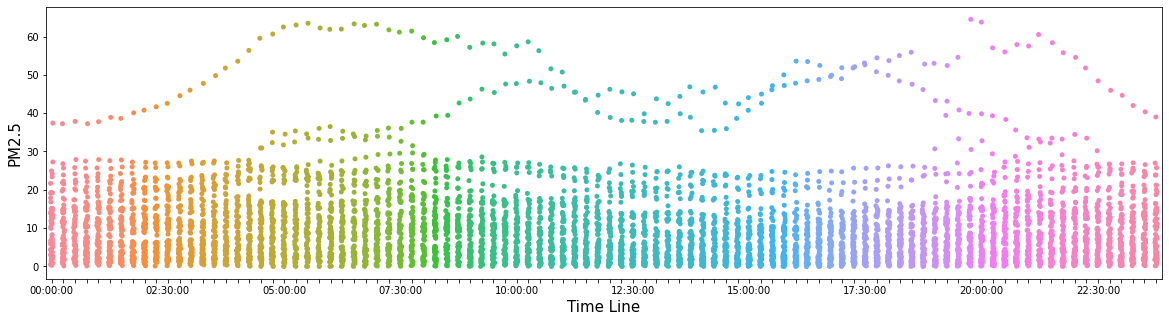

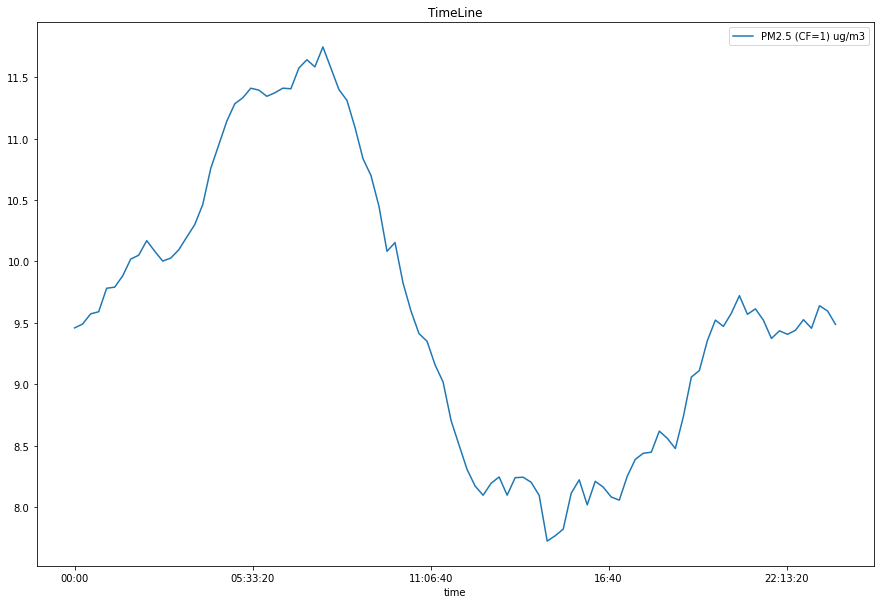

In [14]:
plot_part('Warnow-Chacko')

## UIUC

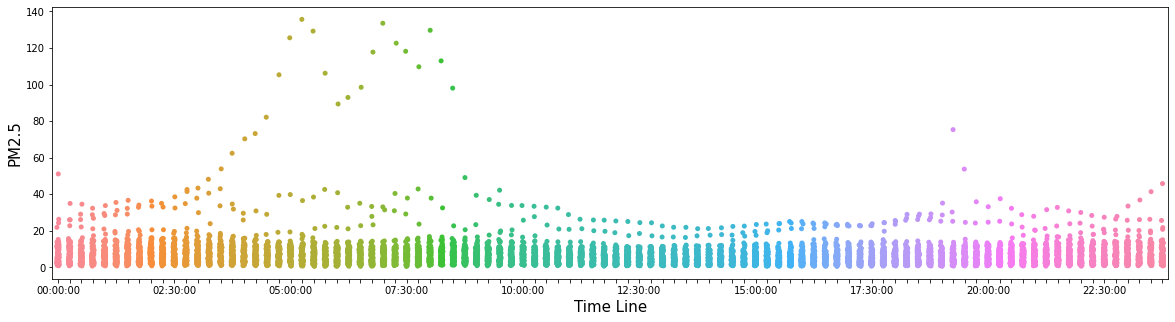

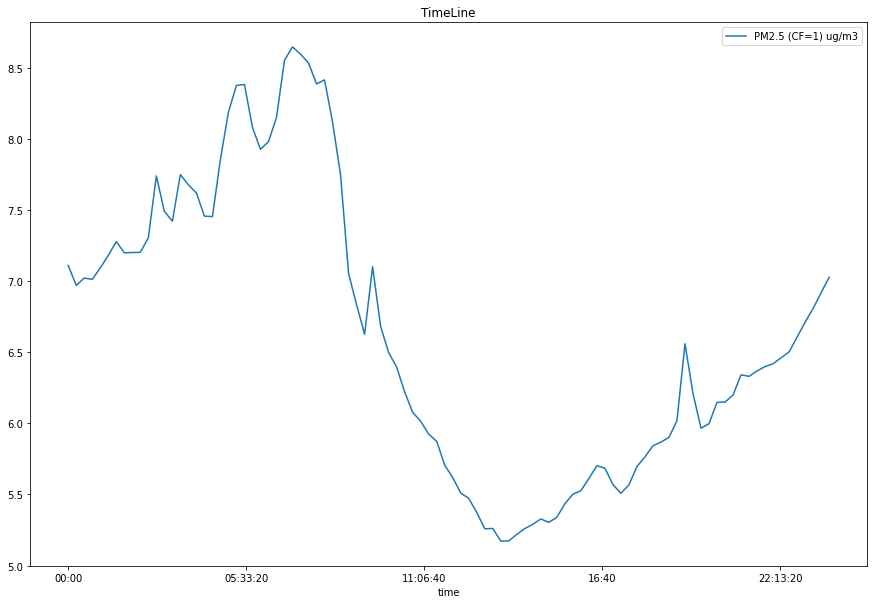

In [15]:
plot_part('UIUC')

<AxesSubplot:xlabel='time'>

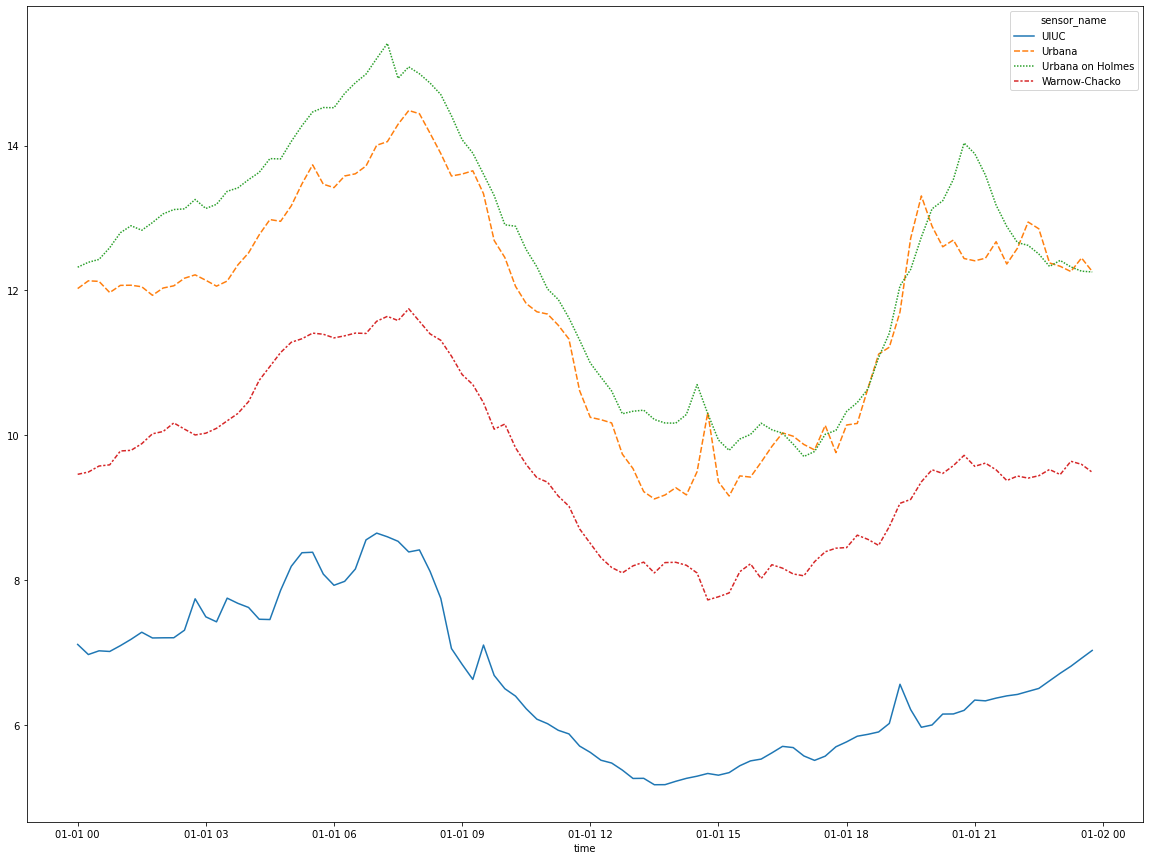

In [16]:
df_temp1 = hour.groupby(['time', 'sensor_name']).agg('mean').reset_index()
df_temp1['time']=pd.to_datetime(df_temp1['time'],format='%H:%M:%S')
df_temp2 = df_temp1.pivot('time', 'sensor_name', 'PM2.5 (CF=1) ug/m3')
plt.figure(figsize=(20, 15))
sns.lineplot(data = df_temp2)

The above plots show that distribution of PM2.5 in each time period and the line charts show the average PM2.5 level in each period.
Based on the scatter diagram and line chart, it seems that the overall thread of average PM2.5 in each period is affected by the outlier.

In [17]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=False)
import cufflinks as cf

# Based on DayofWeek

In [79]:
dayofweek=final_df[['new_date', 'PM2.5 (CF=1) ug/m3', 'sensor_name','dayofweek']]
dayofweek

new_date  PM2.5 (CF=1) ug/m3       sensor_name  dayofweek
0     2021-09-02 04:45:00            7.600000            Urbana          3
1     2021-09-02 04:45:00            8.567143  Urbana on Holmes          3
2     2021-09-02 05:00:00            8.282857            Urbana          3
3     2021-09-02 05:00:00            9.157500  Urbana on Holmes          3
4     2021-09-02 05:15:00            8.436250            Urbana          3
...                   ...                 ...               ...        ...
31682 2021-11-30 14:00:00            4.520000              UIUC          1
31683 2021-11-30 14:15:00            4.380000              UIUC          1
31684 2021-11-30 14:30:00            4.410000              UIUC          1
31685 2021-11-30 14:45:00            4.510000              UIUC          1
31686 2021-11-30 15:00:00            4.460000              UIUC          1

[31687 rows x 4 columns]

In [19]:
def dayofweek_polt(sensor_name: str):
    df_dayofweek = dayofweek[dayofweek['sensor_name']== sensor_name]
    plt.figure(figsize=(20,5))
    chart = sns.barplot(x='dayofweek',y='PM2.5 (CF=1) ug/m3',data=df_dayofweek)
    plt.xticks(chart.get_xticks(), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    plt.ylabel('Average PM2.5', fontsize=15)
    plt.xlabel('Day of Week', fontsize=15)
    print(chart)
    plt.figure(figsize=(10,5))
    sns.stripplot(x='dayofweek',y='PM2.5 (CF=1) ug/m3',data=df_dayofweek)
    plt.xticks(chart.get_xticks(), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    plt.ylabel('PM2.5', fontsize=15)
    plt.xlabel('Day of Week', fontsize=15)
    print(chart)
    plt.figure(figsize=(10,5))
    chart = sns.boxplot(x='dayofweek',y='PM2.5 (CF=1) ug/m3',data=df_dayofweek)
    plt.xticks(chart.get_xticks(), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    plt.ylabel('PM2.5', fontsize=15)
    plt.xlabel('Day of Week', fontsize=15)
    print(chart)

## Urbana

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


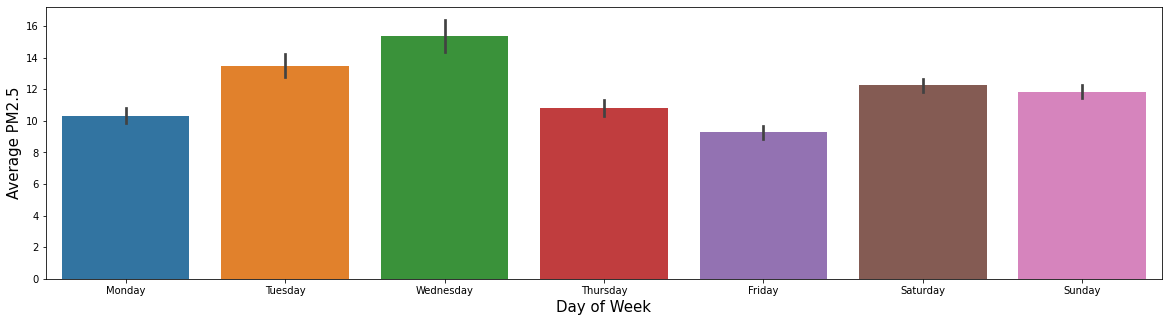

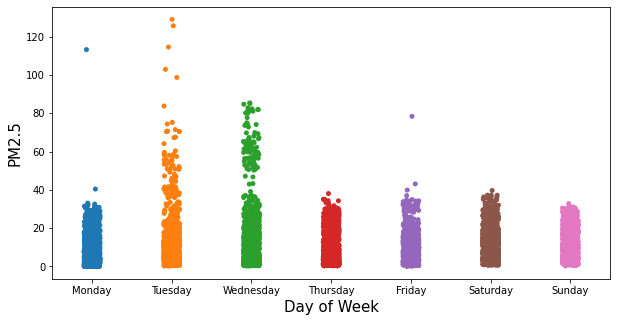

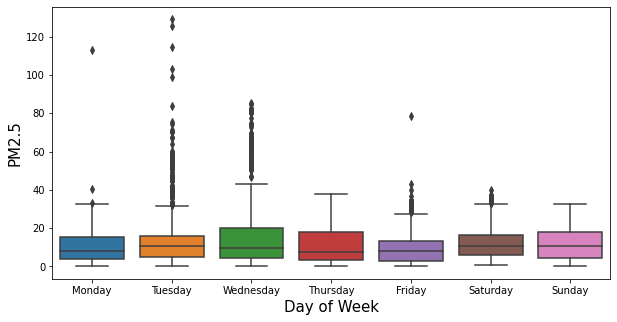

In [20]:
dayofweek_polt('Urbana')

## Urbana on Holmes

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


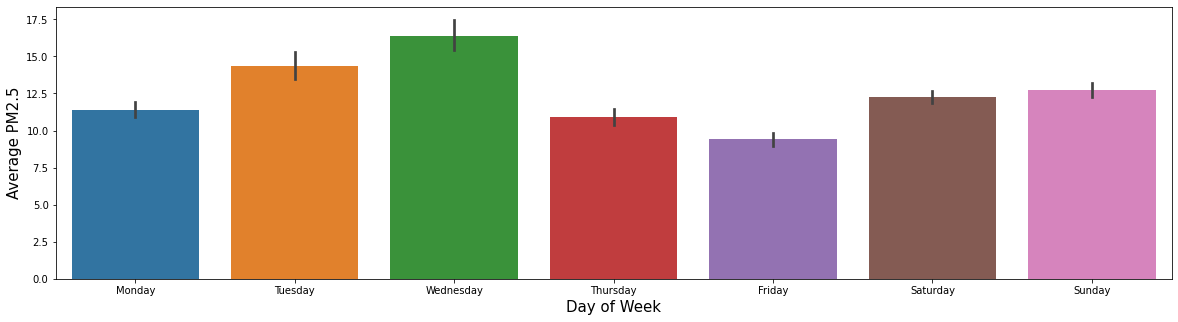

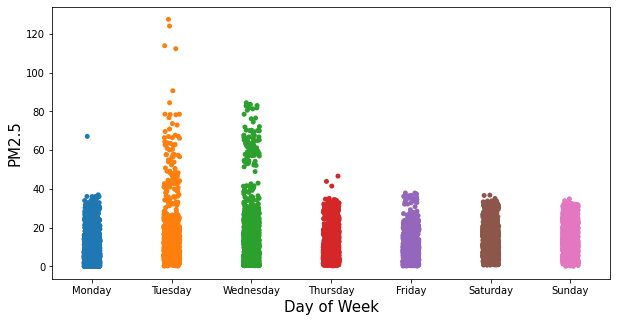

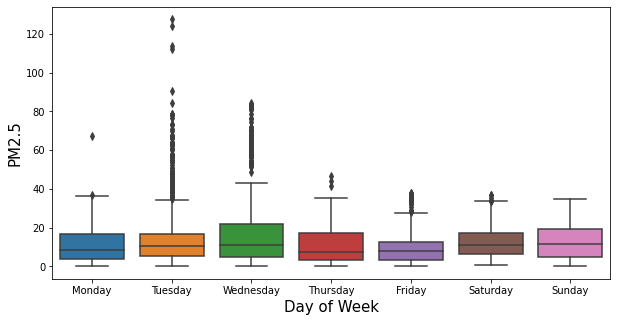

In [21]:
dayofweek_polt('Urbana on Holmes')

## Warnow-Chacko

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


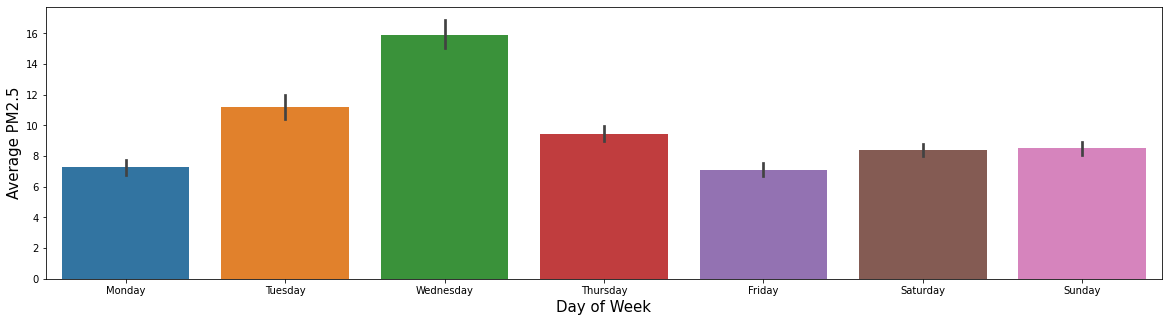

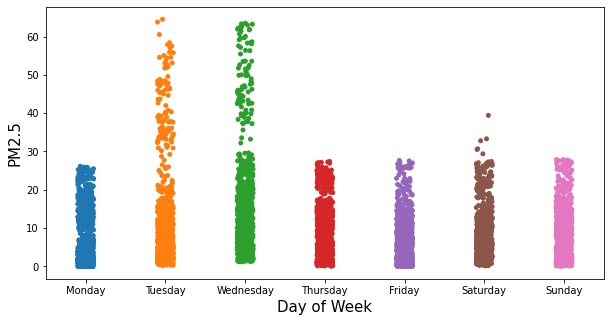

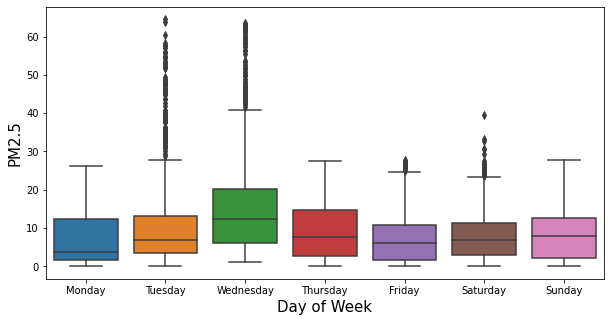

In [22]:
dayofweek_polt('Warnow-Chacko')

## UIUC

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


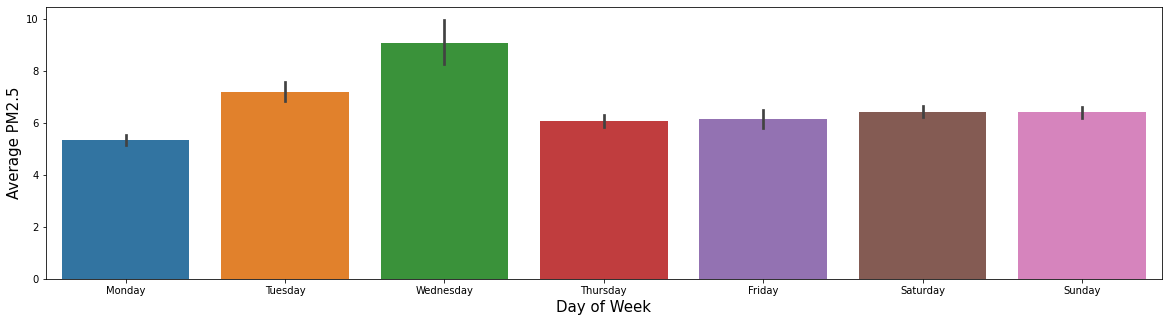

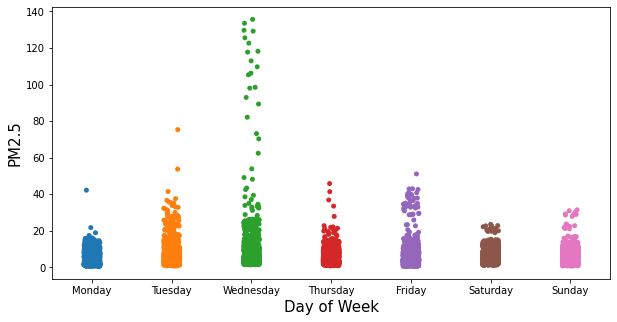

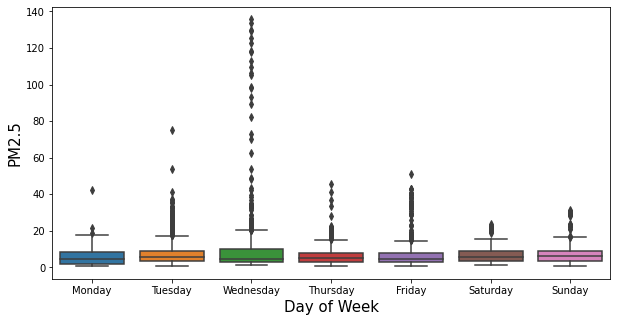

In [23]:
dayofweek_polt('UIUC')

# Find the outliers

In [59]:
df_quantile = final_df.copy()
df_quantile['Is_Time_Outlier'] = df_quantile.apply(lambda time: sf.is_time_outlier(df_quantile, time['time'],time['PM2.5 (CF=1) ug/m3']),axis=1)
df_quantile[df_quantile['Is_Time_Outlier']=='T']['date'].unique()

array([datetime.date(2021, 9, 4), datetime.date(2021, 9, 9),
       datetime.date(2021, 9, 13), datetime.date(2021, 9, 14),
       datetime.date(2021, 9, 17), datetime.date(2021, 9, 18),
       datetime.date(2021, 9, 27), datetime.date(2021, 9, 28),
       datetime.date(2021, 9, 29), datetime.date(2021, 9, 30),
       datetime.date(2021, 10, 1), datetime.date(2021, 10, 6),
       datetime.date(2021, 10, 8), datetime.date(2021, 10, 9),
       datetime.date(2021, 10, 10), datetime.date(2021, 10, 11),
       datetime.date(2021, 10, 26), datetime.date(2021, 10, 29),
       datetime.date(2021, 11, 3), datetime.date(2021, 11, 4),
       datetime.date(2021, 11, 5), datetime.date(2021, 11, 6),
       datetime.date(2021, 11, 7), datetime.date(2021, 11, 8),
       datetime.date(2021, 11, 9), datetime.date(2021, 11, 10),
       datetime.date(2021, 11, 11), datetime.date(2021, 11, 15),
       datetime.date(2021, 11, 16), datetime.date(2021, 11, 17),
       datetime.date(2021, 11, 20), datetime.dat

In [60]:
df_quantile['Is_Dayofweek_Outlier'] = df_quantile.apply(lambda dayofweek: sf.is_date_outlier(df_quantile, dayofweek['dayofweek'],dayofweek['PM2.5 (CF=1) ug/m3']),axis=1)
df_quantile[df_quantile['Is_Dayofweek_Outlier']=='T']['date'].unique()

array([datetime.date(2021, 9, 4), datetime.date(2021, 9, 9),
       datetime.date(2021, 9, 13), datetime.date(2021, 9, 17),
       datetime.date(2021, 9, 18), datetime.date(2021, 9, 19),
       datetime.date(2021, 9, 27), datetime.date(2021, 9, 28),
       datetime.date(2021, 9, 29), datetime.date(2021, 9, 30),
       datetime.date(2021, 10, 1), datetime.date(2021, 10, 5),
       datetime.date(2021, 10, 8), datetime.date(2021, 10, 9),
       datetime.date(2021, 10, 10), datetime.date(2021, 10, 11),
       datetime.date(2021, 10, 22), datetime.date(2021, 10, 24),
       datetime.date(2021, 10, 26), datetime.date(2021, 10, 29),
       datetime.date(2021, 11, 3), datetime.date(2021, 11, 4),
       datetime.date(2021, 11, 5), datetime.date(2021, 11, 6),
       datetime.date(2021, 11, 7), datetime.date(2021, 11, 8),
       datetime.date(2021, 11, 9), datetime.date(2021, 11, 10),
       datetime.date(2021, 11, 11), datetime.date(2021, 11, 15),
       datetime.date(2021, 11, 16), datetime.dat

In [62]:
df_outlier = df_quantile[(df_quantile['Is_Dayofweek_Outlier']=='T') & (df_quantile['Is_Time_Outlier']=='T')]
count = df_outlier.date.value_counts()
df_count = count.to_frame()
data = [
    [str(df_count.index[i]), int(df_count.date[i])]
    for i in range(df_count.size)
]


c = (
    Calendar(init_opts=opts.InitOpts())
    .add(
        series_name="",
        yaxis_data=data,
        calendar_opts=opts.CalendarOpts(
            pos_top="80",  
            pos_left="30", 
            pos_right="30", 
            range_="2021",
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            pos_top="10", 
            pos_left="center", 
            title="PM2.5 count heatmap"
        ),
        visualmap_opts=opts.VisualMapOpts(
            pos_top="230", 
            max_=90, min_=1, 
            orient="horizontal",
            is_piecewise=True, # 
        ),
    )
)
c.render_notebook()

The heatmap shows that there is no regular pattern about on which day of the week the outliers will the outliers.

In [66]:
# Add
df_dayofweek_mean = df_quantile[(df_quantile['sensor_name']== 'Urbana') & (df_quantile['Is_Dayofweek_Outlier']== 'F')]
plt.figure(figsize=(20,5))
chart = sns.barplot(x='dayofweek',y='PM2.5 (CF=1) ug/m3',data=df_dayofweek_mean)
plt.xticks(chart.get_xticks(), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Average PM2.5', fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
print(chart)

ValueError: min() arg is an empty sequence

<Figure size 1440x360 with 0 Axes>

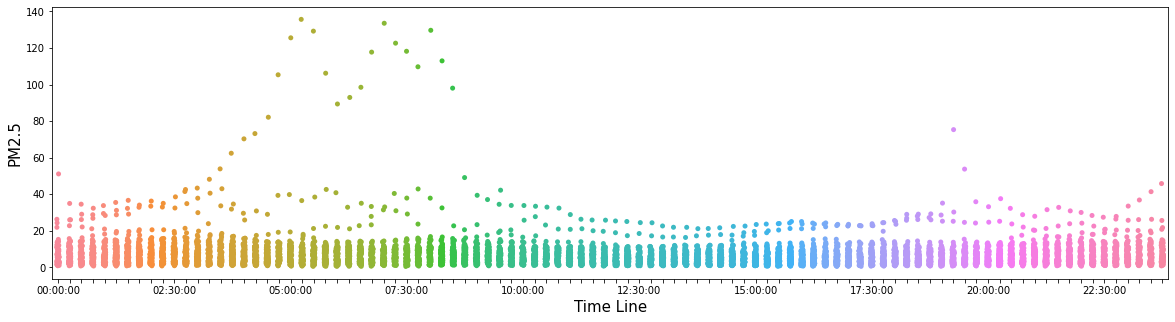

In [68]:
# Add
df_hour= hour[hour['sensor_name']== 'UIUC']
df_hour_plot = df_hour.sort_values(by = ['time']).reset_index()
df_mean = df_hour.groupby('time').agg('mean').reset_index()
plt.figure(figsize=(20,5))
chart = sns.stripplot(x='time',y='PM2.5 (CF=1) ug/m3',data=df_hour_plot)
plt.ylabel('PM2.5', fontsize=15)
plt.xlabel('Time Line', fontsize=15)
for ind, label in enumerate(chart.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

([<matplotlib.axis.XTick at 0x21d84c11100>,
 [Text(-25567.0, 0, '00:00'),
  Text(-25566.875, 0, '03:00'),
  Text(-25566.75, 0, '06:00'),
  Text(-25566.625, 0, '09:00'),
  Text(-25566.5, 0, '12:00'),
  Text(-25566.375, 0, '15:00'),
  Text(-25566.25, 0, '18:00'),
  Text(-25566.125, 0, '21:00'),
  Text(-25566.0, 0, '00:00')])

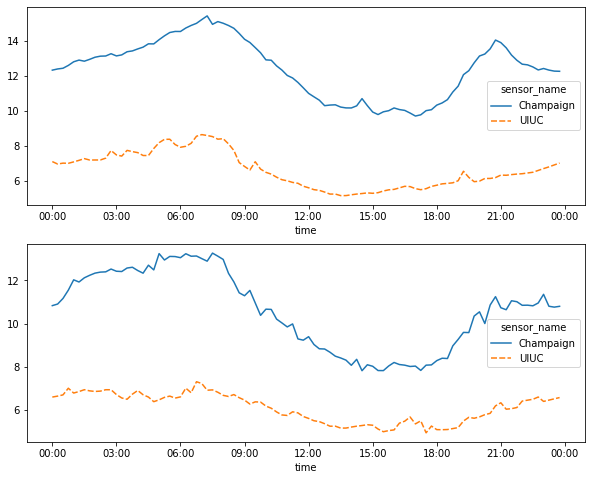

In [69]:
# Add
f = plt.figure(figsize=(10, 8))

f.add_subplot(2,1,1)
df_temp1 = hour.groupby(['time', 'sensor_name']).agg('mean').reset_index()
df_temp1['time']=pd.to_datetime(df_temp1['time'],format='%H:%M:%S')
df_temp2 = df_temp1.pivot('time', 'sensor_name', 'PM2.5 (CF=1) ug/m3')
line_plot = sns.lineplot(data = df_temp2)
plt.xticks(line_plot.get_xticks(), ['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','00:00'])

f.add_subplot(2,1,2)
df_notemp1 = df_quantile[df_quantile['Is_Time_Outlier'] == 'F'].groupby(['time', 'sensor_name']).agg('mean').reset_index()
df_notemp1['time']=pd.to_datetime(df_temp1['time'],format='%H:%M:%S')
df_notemp2 = df_notemp1.pivot('time', 'sensor_name', 'PM2.5 (CF=1) ug/m3')
line_plot2 = sns.lineplot(data = df_notemp2)
plt.xticks(line_plot2.get_xticks(), ['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','00:00'])

NameError: name 'dayofweek' is not defined

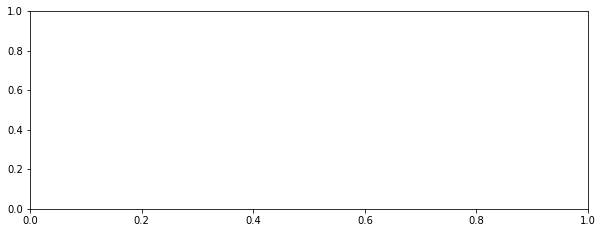

In [70]:
# Add
f = plt.figure(figsize=(10, 8))

f.add_subplot(2,1,1)
df_temp1 = dayofweek.groupby(['dayofweek', 'sensor_name']).agg('mean').reset_index()
# df_temp1['dayofweek']=pd.to_datetime(df_temp1['dayofweek'],format='%H:%M:%S')
df_temp2 = df_temp1.pivot('dayofweek', 'sensor_name', 'PM2.5 (CF=1) ug/m3')
line_plot = sns.lineplot(data = df_temp2)
plt.xticks(line_plot.get_xticks(), ['','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday',''])

f.add_subplot(2,1,2)
df_notemp1 = df_quantile[df_quantile['Is_Dayofweek_Outlier'] == 'F'].groupby(['dayofweek', 'sensor_name']).agg('mean').reset_index()
df_notemp2 = df_notemp1.pivot('dayofweek', 'sensor_name', 'PM2.5 (CF=1) ug/m3')
line_plot2 = sns.lineplot(data = df_notemp2)
plt.xticks(line_plot2.get_xticks(), ['','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday',''])